In [ ]:
import pandas as pd
import io
from google.colab import files
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
uploaded = files.upload()

Saving crabs.csv to crabs.csv


In [ ]:
crabs_data = pd.read_csv('crabs.csv') # crabs_data is dataframe
#Rename the columns
crabs_data = crabs_data.rename(columns={'sp':'species','FL':'Frontal lobe', 'RW':'Rear Width','CL':'Carapace Midline', 'CW':'Maximum Width','BD':'Body depth'})
#Rename the items from columns species/sex
crabs_data['species'] = crabs_data['species'].map({'B':'Blue','O':'Orange'})
crabs_data['sex'] = crabs_data['sex'].map({'M':'Male','F':'Female'})

In [ ]:
crabs_data.head()

,species,sex,index,Frontal lobe,Rear Width,Carapace Midline,Maximum Width,Body depth
0,Blue,Male,1,8.1,6.7,16.1,19.0,7.0
1,Blue,Male,2,8.8,7.7,18.1,20.8,7.4
2,Blue,Male,3,9.2,7.8,19.0,22.4,7.7
3,Blue,Male,4,9.6,7.9,20.1,23.1,8.2
4,Blue,Male,5,9.8,8.0,20.3,23.0,8.2


In [ ]:
crabs_data['class'] = crabs_data.species + crabs_data.sex

In [ ]:
data_columns = ['Frontal lobe','Rear Width','Carapace Midline','Maximum Width','Body depth']

#standardized data

In [ ]:
crabs_standardized = crabs_data.copy()
crabs_standardized[data_columns] = StandardScaler().fit_transform(crabs_data[data_columns])


In [ ]:
crabs_standardized.describe()

,index,Frontal lobe,Rear Width,Carapace Midline,Maximum Width,Body depth
count,200.000000,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,200.000000
mean,25.500000,-7.105427e-17,6.039613e-16,1.065814e-16,-4.973799e-16,0.000000
std,14.467083,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509
min,1.000000,-2.404365e+00,-2.430365e+00,-2.451077e+00,-2.459741e+00,-2.321439
25%,13.000000,-7.695229e-01,-6.772765e-01,-6.802407e-01,-6.258715e-01,-0.770008
50%,25.500000,-9.464874e-03,2.395888e-02,-7.745210e-04,4.909420e-02,-0.038200
75%,38.000000,7.075710e-01,6.083217e-01,7.209382e-01,7.113247e-01,0.752152
max,50.000000,2.155984e+00,2.906815e+00,2.181966e+00,2.315960e+00,2.215766


<Axes: xlabel='TSNE1', ylabel='TSNE2'>

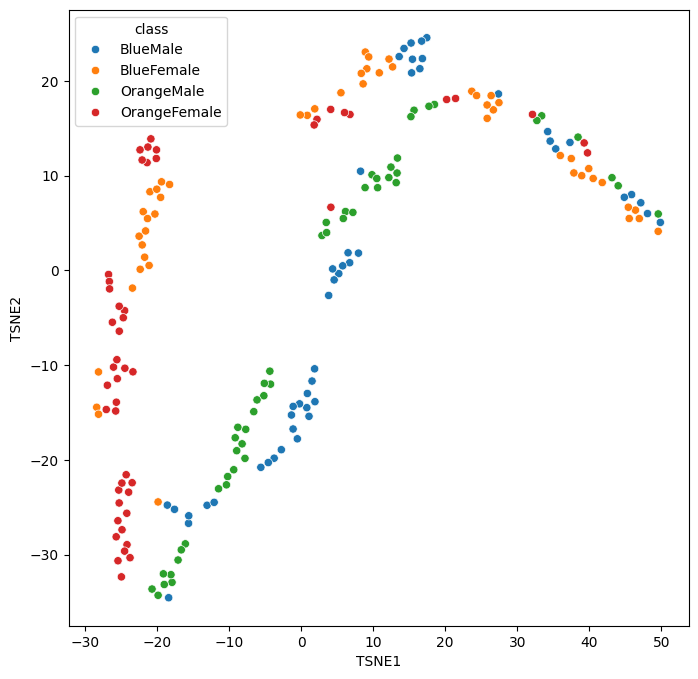

In [ ]:
crabs_tsne = TSNE(n_components=2, perplexity=10,n_iter=1000,init='random').fit_transform(crabs_standardized[data_columns])
crabs_standardized[['TSNE1','TSNE2']] = crabs_tsne
fig = plt.figure(figsize=(8,8))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='class', data=crabs_standardized)